In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_train = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\train_ctrUa4K.csv'
loan_test = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\test_lAUu6dG.csv'

In [3]:
loan_train = pd.read_csv(loan_train)
loan_test = pd.read_csv(loan_test)

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Before we build our model lets first understand the given data by performing univariate and bivariate analysis. We do univariate analysis to summarise and describe individual variable and find pattern in it and Bivariate analysis is done to check corelation between each variable in the dataset with the target variable.

Univariate Analysis

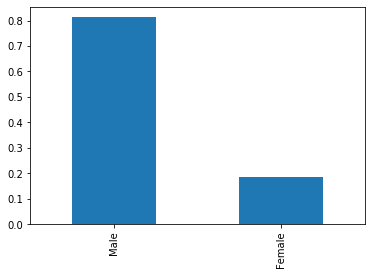

In [6]:
loan_train["Gender"].value_counts(normalize=True).plot.bar()

Around 80% of the loan applicants are Male

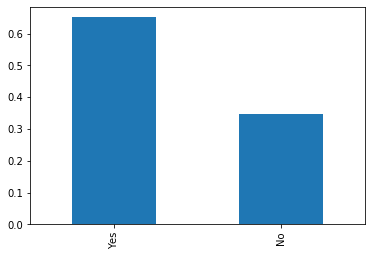

In [7]:
loan_train["Married"].value_counts(normalize=True).plot.bar()

Approx 65% of applicants are Married

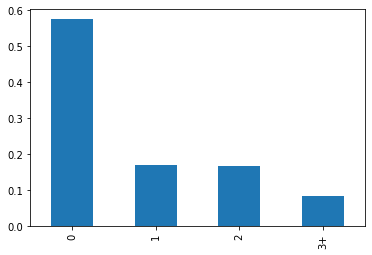

In [8]:
loan_train["Dependents"].value_counts(normalize=True).plot.bar()

More than 50% of the applicants don't have Dependents

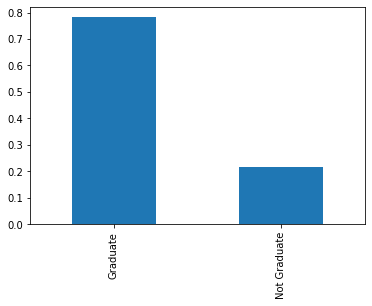

In [9]:
loan_train["Education"].value_counts(normalize=True).plot.bar()

Around 80% of the applicants are Graduate

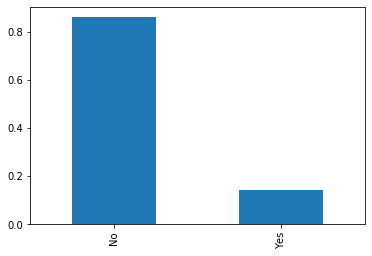

In [10]:
loan_train["Self_Employed"].value_counts(normalize=True).plot.bar()

Majority of the applicants are working proffessionals

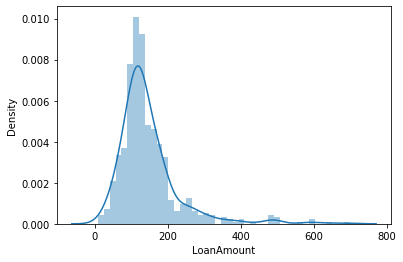

In [11]:
sns.distplot(loan_train["LoanAmount"])
plt.show()

Distribution is relatively normal but it is right skewed, due to presence of outliers

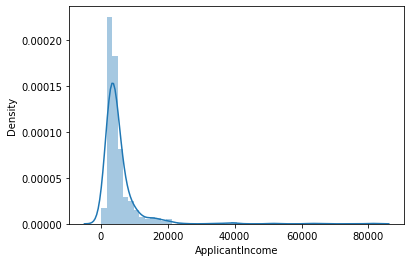

In [12]:
sns.distplot(loan_train["ApplicantIncome"])

Distribution is right skewed due to outliers.
Does education has any role in ones higher income? lets plot a box plot to find the answer

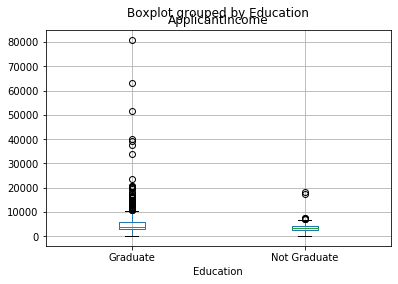

In [13]:
loan_train.boxplot(column="ApplicantIncome",by="Education")
plt.show()

From box plot we can see that graduates have higher income compared to non graduates.

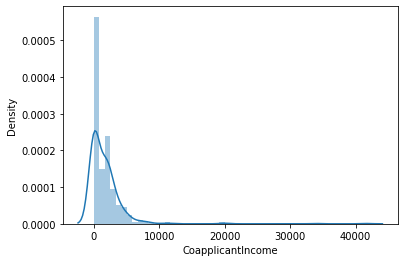

In [14]:
sns.distplot(loan_train["CoapplicantIncome"])

Distribution is similar to applicant income

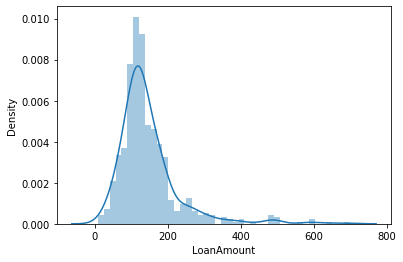

In [15]:
sns.distplot(loan_train["LoanAmount"])

Distribution is relatively normal but it is right skewed, due to presence of outliers.

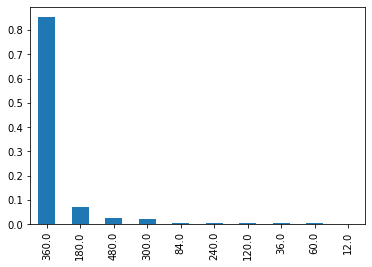

In [16]:
loan_train["Loan_Amount_Term"].value_counts(normalize=True).plot.bar()

Majority of the applicants have opted for 360 months period to return their loan.

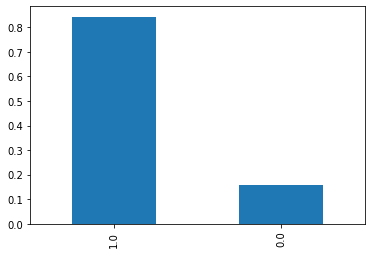

In [17]:
loan_train["Credit_History"].value_counts(normalize=True).plot.bar()

Around 80% of the applicants have credit history

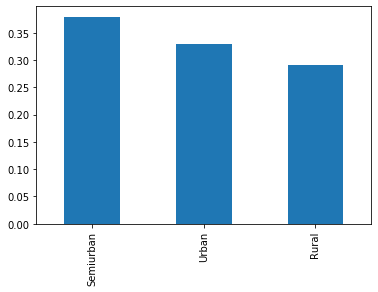

In [18]:
loan_train["Property_Area"].value_counts(normalize=True).plot.bar()

35% of loan applicants live in semiurban area

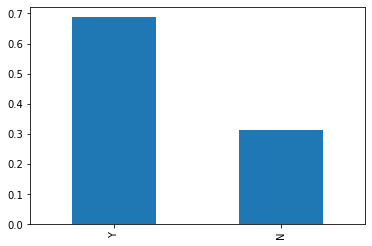

In [19]:
loan_train["Loan_Status"].value_counts(normalize=True).plot.bar()

Around 69% of the loan application were approved

# To summarize most of the loan applicants are graduate working professionals living in semiurban area who are married and don't have dependents

Bivariate Analysis

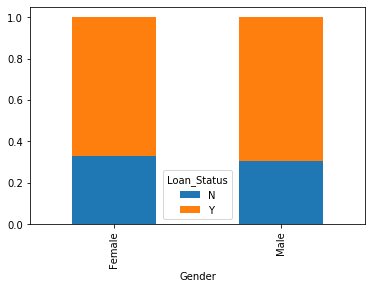

In [20]:
pd.crosstab(loan_train["Gender"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

More or less same percentage of loan applications have been approved for both male & female

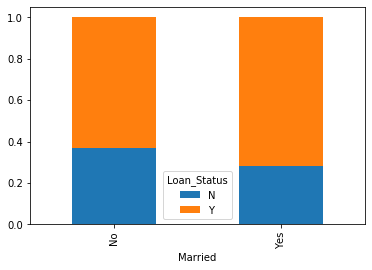

In [21]:
pd.crosstab(loan_train["Married"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Married applicants have more chances of getting loan approved

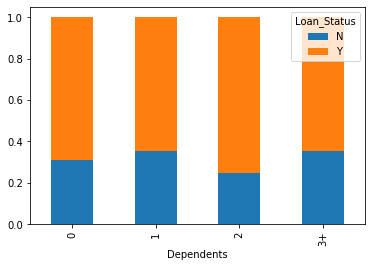

In [22]:
pd.crosstab(loan_train["Dependents"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Number of dependents  doesn't impact ones approval for loan

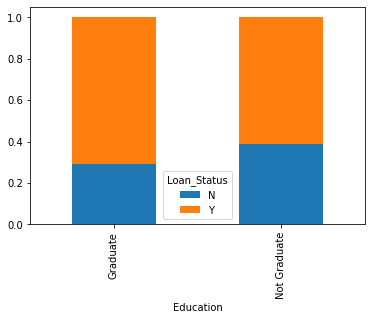

In [23]:
pd.crosstab(loan_train["Education"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Graduates have more chances of getting their loan approved then non graduates

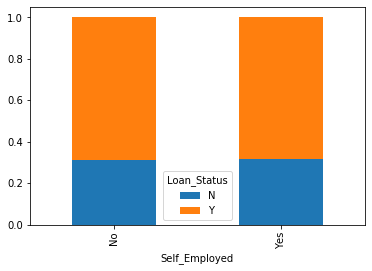

In [24]:
pd.crosstab(loan_train["Self_Employed"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Working proffesional or self employed have similar approval rate

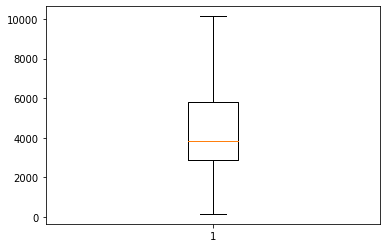

In [25]:
plt.boxplot(x="ApplicantIncome",data=loan_train,showfliers=False)
plt.show()

In [26]:
bins = [0,2000,4000,6000,8000,10000,81000]
groups = ["low","average","medium","medium_high","high","very_high"]
loan_train["Income_bin"] = pd.cut(loan_train["ApplicantIncome"],bins,labels=groups)
loan_train["Income_bin"].value_counts()

average        293
medium         143
medium_high     54
very_high       52
low             41
high            31
Name: Income_bin, dtype: int64

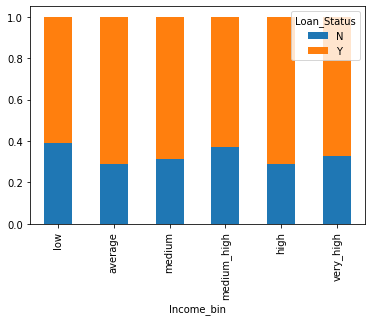

In [27]:
pd.crosstab(loan_train["Income_bin"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Applicants income doesn't affect on loan approval and It can be infered that having a high income doesn't mean getting loan approval will be easy.

In [28]:
# we will drop Income_bin as we had created it for data exploration only
loan_train = loan_train.drop("Income_bin",axis=1)

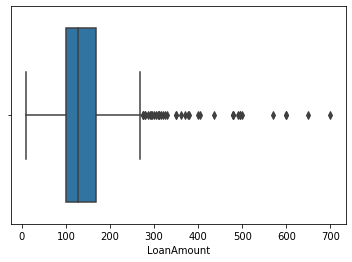

In [29]:
sns.boxplot(x="LoanAmount",data=loan_train)
plt.show()

In [30]:
bins = [0,100,200,300,700]
groups = ["low","medium","high","very_high"]
loan_train["LoanAmount_bin"] = pd.cut(loan_train["LoanAmount"],bins,labels=groups)
loan_train["LoanAmount_bin"].value_counts()

medium       358
low          154
high          51
very_high     29
Name: LoanAmount_bin, dtype: int64

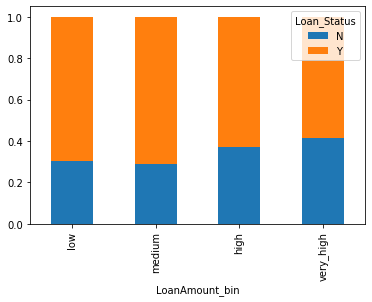

In [31]:
pd.crosstab(loan_train["LoanAmount_bin"],loan_train["Loan_Status"],normalize="index").plot.bar(stacked=True)

Higher the loan amount lesser the chances of getting loan approved

In [33]:
# we will drop LoanAmount_bin as we had created it for data exploration only
loan_train = loan_train.drop("LoanAmount_bin",axis=1)

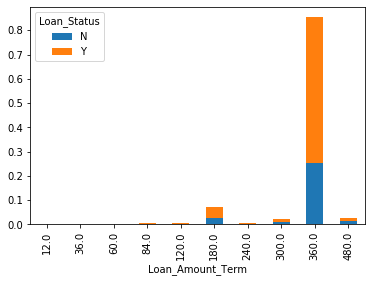

In [34]:
pd.crosstab(loan_train["Loan_Amount_Term"],loan_train["Loan_Status"],normalize=True).plot.bar(stacked=True)

Loan term doesn't affect loan application

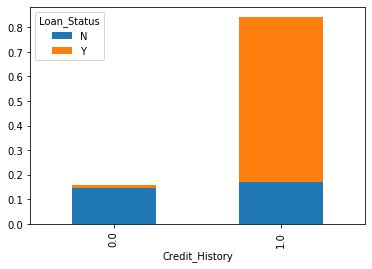

In [35]:
pd.crosstab(loan_train["Credit_History"],loan_train["Loan_Status"],normalize=True).plot.bar(stacked=True)

Having a credit history has very high impact on getting loan approval

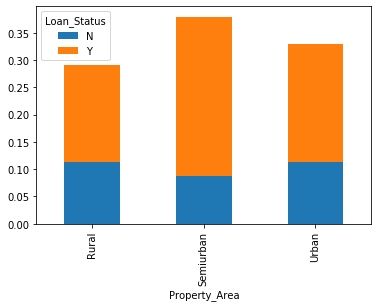

In [36]:
pd.crosstab(loan_train["Property_Area"],loan_train["Loan_Status"],normalize=True).plot.bar(stacked=True)

People living in semiurban area have higher chances of loan getting approved than that of people living in Rural & Urban area